In [1]:
import os
import sys

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('..'))
from utils.plot_utils import plot_hist

# Load all data

In [2]:
data_dir = '../../data/'
plots_dir = '../../plots/new_data/'


imaging_df = pd.read_csv(data_dir + "core_data_set_20200211_adalab_imaging.csv")
imaging_df = imaging_df.drop('subject', axis=1)
imaging_df

,BrainVol_cm3_pre,BFCS_Vol_cm3_pre,NBM_Vol_cm3_pre,time,LeftLateralVentricle,LeftInfLatVent,LeftCerebellumWhiteMatter,LeftCerebellumCortex,LeftThalamusProper,LeftCaudate,...,ThalamusProper,Caudate,Putamen,Pallidum,Hippocampus,Amygdala,Accumbensarea,VentralDC,vessel,choroidplexus
0,1107.945,2306,1795,1,14119.7,729.1,11861.5,49127.6,6683.8,3260.3,...,6742.7,3344.05,4364.25,1606,3943.25,1615.2,498.8,3917.3,25.55,1003.55
1,841.06,1830,1470,1,37807,2075.1,12434.7,48230,5796.2,3900.3,...,5547.85,4234.4,3675.2,1678.85,2824.8,993.65,240.65,3715.3,42.35,1699.45
2,906.23,2222,1749,1,31946.8,1102.5,12242.7,48261.6,5881.4,2824.9,...,5747.7,3178.7,3814.6,1478.75,3306.95,1384.9,432.75,3668.6,58.4,1044.6
3,992.39,2267,1722,1,9823.9,490.7,14481.1,47608.6,6218.2,2999.1,...,6055.5,3095.25,3876.3,1463.05,4155.9,1611.9,614.75,3388.95,35.2,713.45
4,1132.511,2424,1875,1,19195.2,347.7,17549.6,49171.3,6756,3181.6,...,6570.4,3343,4816.05,1934.75,4517.35,1921.15,470.45,4086.75,41.1,658.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,,,,,,,,,,,...,,,,,,,,,,
929,,,,,,,,,,,...,,,,,,,,,,
930,,,,,,,,,,,...,,,,,,,,,,
931,,,,,,,,,,,...,,,,,,,,,,


In [ ]:
cubic_vol_features = np.load(os.path.join(data_dir, "feature_lists", "needed_old_blood_data_features.npy"))
#imaging_df[cubic_vol_features].isna().sum()
cubic_vol_features

In [ ]:
region_features = np.load(os.path.join(data_dir, "feature_lists", "allowlist_imaging_data.npy"))
imaging_df[region_features].isna().sum()

In [ ]:
clinical_df = pd.read_csv(data_dir + "core_data_set_20200211_adalab_clinical.csv", encoding="ISO-8859-1")
clinical_df

## Old and new blood values should be the same

In [3]:
blood_df = pd.read_csv(data_dir + "core_data_set_20200211_adalab_blood.csv")
blood_df

,subject,T1_Proinsulinintakt,T1_oxLDL,T1_Nitrotyrosin,T1_S100A12_plasma,T1_Calprotectinn,T1_Zonulin_N1200,T1_hArginin,T1_ADMA,T1_SDMA,...,T1_Leptin_SLR_Ratio,T1_Leptin_Adipon_Ratio,T1_SORL1,T1_IL2_pgml,T1_IL8_pgml,T1_IL10_pgml,T1_IL18_pgml,T1_Volk_IL8_pgml,T1_IL18_pgml_Boraschi,Final_T1_TP42_40
0,Sub1,,,,,,,,,,...,,,,,,,,,,
1,Sub2,,,,,,,,,,...,,,,,,,,,,
2,Sub3,,,,,,,,,,...,,,,,,,,,,
3,Sub4,,,,,,,,,,...,,,,,,,,,,
4,Sub5,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,Sub929,,,,,,24.567,,,,...,3.73197265813037,4.83945068664169,.295,,253,,39.17,,,.0594641428469913
929,Sub930,,,,,,19.031,,,,...,.235009756962923,.522635368379523,.161,1093,,,44.05,,,.056680290872464
930,Sub931,,,,,,27.591,,,,...,.0814090438630911,.209805003679171,1.636,885,,,23.41,,,.150973391369917
931,Sub932,,,,,,20.569,,,,...,0,0,.861,,,,20.54,,,.10305748207611


<AxesSubplot:>

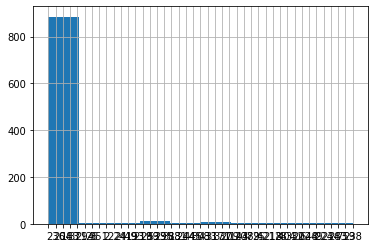

In [5]:
blood_df['T1_IL10_pgml'].hist()


<AxesSubplot:>

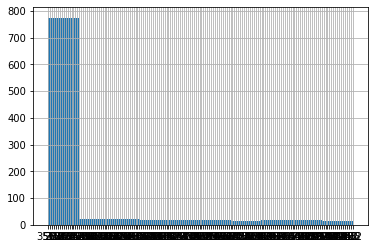

In [6]:
blood_df['T1_Volk_IL8_pgml'].hist()


In [ ]:
blood_df['T1_IL18_pgml_Boraschi'].hist()

In [ ]:
old_blood_df = pd.read_excel(data_dir + "blutdaten.xlsx")
old_blood_df

In [ ]:
## Old and new blood files contain same columns... seems to be the same data but with subject ID for mapping!
difference = set(set(old_blood_df.columns) - set(blood_df.columns))
difference

In [ ]:
take_from_old_blood_data = ['Alter', 'Gewicht', 'Groesse', 'MMSE', 'sex','POCD_dichotomous_T2', 'POD', 'PreCI_dichotomous_T0']
np.save(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data",'needed_old_blood_data_features.npy'), take_from_old_blood_data)

In [ ]:
blood_df = blood_df.replace("#NULL!", math.nan)
blood_df = blood_df.replace(' ', math.nan)
old_blood_df = old_blood_df.replace("#NULL!", math.nan)
old_blood_df = old_blood_df.replace(' ', math.nan)
same_cols = list(set(blood_df.columns) - difference - set(['subject']))
pd.concat([blood_df[same_cols], old_blood_df[same_cols]])

# Distributions

In [ ]:
imaging_df = imaging_df.replace("#NULL!", math.nan)
imaging_df = imaging_df.replace(' ', math.nan)

imaging_df

In [ ]:
imaging_df.describe()

In [ ]:
imaging_df.info()

In [ ]:
imaging_df.dtypes

In [ ]:
imaging_df = imaging_df.astype(float)
imaging_df.info()

In [ ]:
# Plot histograms:
#plot_hist(imaging_df, plots_dir=plots_dir)

# Looking at features with no distribution

In [ ]:
weird_features = open(data_dir + "removelist_imaging_features.txt", "r")
weird_features_names = [w.strip() for w in weird_features.readlines()]

In [ ]:
# These are modalities for the white matter (that's why it says "WM")
weird_features_names

In [ ]:
for feature in weird_features_names:
    feature_data = imaging_df.loc[:, feature]
    print(feature, ":\nmin_vals\n", feature_data.min(), "\nmax_vals\n", feature_data.max(), "\n")
    print(feature_data.describe(), "\n")
    print(feature_data.unique(), "\n")
print(imaging_df[weird_features_names].info())


In [ ]:
imaging_df['nonWMhypointensities'].dropna().hist()

In [ ]:
imaging_df[weird_features_names].dropna()

# NaNs

In [ ]:
missing = imaging_df.isna()
missing.mean().sort_values(ascending=False)

In [ ]:
imaging_df.dropna()

## From a total of 1090 columns, 1087 all have 438 missings and the remaining 3 have 453 missings

In [ ]:
num_nans_per_col = imaging_df.apply(lambda x: x.isnull().sum(), axis=0)


In [ ]:
num_nans_per_col[num_nans_per_col == 438]

In [ ]:
num_nans_per_col[num_nans_per_col == 453]

In [ ]:
feat_with_more_nans = ['BrainVol_cm3_pre', 'BFCS_Vol_cm3_pre', 'NBM_Vol_cm3_pre']

In [ ]:
imaging_df.loc[imaging_df['BrainVol_cm3_pre'].isna() & ~imaging_df['LeftLateralVentricle'].isna(), :]

In [ ]:
imaging_df.loc[imaging_df['BFCS_Vol_cm3_pre'].isna() & ~imaging_df['LeftCerebellumCortex'].isna(), :]

### These features 'BrainVol_cm3_pre', 'BFCS_Vol_cm3_pre', 'NBM_Vol_cm3_pre' have more missings --> what do they stand for?

# Summarize "non-weird" and brain region-associated features to a single missing feature

In [ ]:
region_features = list(set(imaging_df.columns) - set(weird_features_names))
np.save(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data",'allowlist_imaging_data.npy'), region_features)
list_=np.load(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data",'allowlist_imaging_data.npy'))

In [ ]:
np.save(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data",'removelist_imaging_data.npy'), weird_features_names)

In [ ]:
np.save(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data",'cubic_features_imaging_data.npy'), feat_with_more_nans)

In [ ]:
removelist_file = open(os.path.join("/home/angelie/Documents/AdaLab/pharmaimage/data", "removelist_imaging_features.txt"), "r")
removelist = [w.strip() for w in removelist_file.readlines()] + ['time']
allowlist = list(set(imaging_df.columns) - set(removelist))
imaging_df[allowlist]

## Write feature names to txt-file for reuse

In [ ]:
dest_file = open(data_dir + 'neuro_regions.txt','w')

for feat in region_features:
    dest_file.write(feat + '\n')
dest_file.close()

# Concatenate blood and brain DataFrames

In [ ]:
_imaging_df = pd.read_csv(data_dir + "core_data_set_20200211_adalab_imaging.csv")
_imaging_df

In [ ]:
_blood_df = pd.read_csv(data_dir + "core_data_set_20200211_adalab_blood.csv")
_blood_df

In [ ]:
merged_df = pd.concat([_blood_df, _imaging_df], axis=1, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
#merged_df = merged_df.drop('subject', axis=1)
merged_df

In [ ]:
!pip install openpyxl
merged_df.to_excel(data_dir + 'merged_data.xlsx')

In [ ]:
_imaging_df[_imaging_df[region_features].isna()]


In [ ]:
_imaging_df[~_imaging_df[region_features].isna()]


In [ ]:
imaging_df['regions_nan'] = np.where(imaging_df.sum(axis=1) == 0, 1, 0)
imaging_df
#imaging_df[imaging_df.sum(axis=1) == 0]

# Dim reduction

In [ ]:
import umap.plot
import bokeh

In [ ]:
imaging_df_ = imaging_df.drop(weird_features_names, axis=1)
imaging_df_nona = pd.concat([imaging_df_, clinical_df['POD']], axis=1)
imaging_df_nona = imaging_df_nona.replace(' ', math.nan).dropna()
pod_labels = imaging_df_nona['POD'].astype(int)
print(pod_labels.isna().sum())
imaging_df_ = imaging_df_nona.drop(['POD', 'regions_nan'], axis=1)
df_means = imaging_df_.mean(axis=0)
df_stds = imaging_df_.std(axis=0)
# Apply normalization:
imaging_df_normalized = (imaging_df_ - df_means) / df_stds


In [ ]:
imaging_df_normalized.describe()

In [ ]:
# Calc UMAP:
reducer = umap.UMAP(set_op_mix_ratio=0.25)
embedded = reducer.fit_transform(imaging_df_normalized)#, Y)

In [ ]:
# Apply LOF on UMAP embeddings:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(contamination=0.01)
y_pred = clf.fit_predict(embedded)
X_scores = clf.negative_outlier_factor_
outliers_UMAP = y_pred == -1
imaging_df_normalized[outliers_UMAP]

In [ ]:
# Outliers calculated on UMAP:
p = umap.plot.points(reducer, labels=outliers_UMAP, values=None, theme='fire')
plt.title("Outliers calculated on UMAP embeddings. Coloring=Marked as outlier")
fig = p.get_figure()
fig.savefig(plots_dir + "UMAP_outliers.pdf")

## PCA

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca_embedding = pca.fit_transform(imaging_df_normalized)
#pca_test_embedding = pca.transform(test_data)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.figure().patch.set_color('white')
plt.plot(var, color='#387387')

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
#plt.style.context('seaborn-whitegrid')

ax = plt.gca()
ax.set_facecolor('white')
ax.spines['left'].set_color('#25404B')
ax.spines['bottom'].set_color('#25404B')
ax.tick_params(axis='x', colors='#25404B')
ax.tick_params(axis='y', colors='#25404B')
ax.yaxis.label.set_color('#25404B')
ax.xaxis.label.set_color('#25404B')
ax.title.set_color('#25404B')
#ax.xaxis.set_ticks(np.arange(0, 100, 10))
dest_path = os.path.join(plots_dir, f"PCA_imaging_data.png")
fig.savefig(dest_path)

print(pca.explained_variance_ratio_[:400].sum())

In [ ]:
pca_embedding

In [ ]:
plot_embedding(pca_embedding[:,:2], pod_labels, "PCA")

## UMAP

In [ ]:
umapper = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.01)
umap_embedding = umapper.fit_transform(imaging_df_normalized)


In [ ]:
from utils.plot_utils import plot_embedding
plot_embedding(umap_embedding, pod_labels, "UMAP Clusters")

In [ ]:
umapper_large = umap.UMAP(n_components=300, n_neighbors=15, min_dist=0.01)
umap_embedding_large = umapper_large.fit_transform(imaging_df_normalized)


## PCA+UMAP

In [ ]:
pca_umapper = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.01)
pca_umap_embedding = pca_umapper.fit_transform(pca_embedding)
plot_embedding(pca_umap_embedding, pod_labels, "PCA + UMAP")

# Basic RF

### Looking only at the non-NaN cases here (N=476)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

In [ ]:
train_img_df, test_img_df, train_pod_labels, test_pod_labels = train_test_split(imaging_df_normalized, pod_labels, test_size=0.15)

In [ ]:
len(train_img_df)

#### With all dims

In [ ]:
weights = class_weight={0: 1 - train_pod_labels.mean(), 1: train_pod_labels.mean()}
clf = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf.fit(train_img_df, train_pod_labels)

### Baseline for POD 0.1634

In [ ]:
preds = clf.predict(test_img_df)
print(train_pod_labels.mean())
print((preds == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds))
print(classification_report(test_pod_labels, preds))

In [ ]:
len(imaging_df_normalized[pod_labels == 1])

#### Reduced dims

In [ ]:
clf_pca = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_pca.fit(pca.transform(train_img_df), train_pod_labels)

In [ ]:
preds_pca = clf_pca.predict(pca.transform(test_img_df))
print(train_pod_labels.mean())
print((preds_pca == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_pca))
print(classification_report(test_pod_labels, preds_pca))

In [ ]:
clf_umap = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_umap.fit(umapper_large.transform(train_img_df), train_pod_labels)

In [ ]:
preds_umap = clf_umap.predict(umapper_large.transform(test_img_df))
print(train_pod_labels.mean())
print((preds_umap == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_umap))
print(classification_report(test_pod_labels, preds_umap))

## On both blood and imaging data

In [ ]:
from preprocess_utils.iterative_imputer import get_iterative_imputer

def _iterative_imputation(df, estimator):
    estimators_dict = {'bayesridge': None}

    imputer = get_iterative_imputer(estimators_dict[estimator])
    numpy_df = df.to_numpy()
    imputed_array = imputer.fit_transform(numpy_df)
    print("Imputed array shape: ", imputed_array.shape)
    print("Columns len, names: ", len(df.columns), df.columns)
    df_imputed = pd.DataFrame(data=imputed_array, columns=df.columns)
    return df_imputed

In [ ]:
merged_df_ = merged_df.replace("#NULL!", math.nan).replace(' ', math.nan)

merged_clin_df = pd.concat([merged_df_, clinical_df], axis=1, join='outer')

merged_clin_df = merged_clin_df.replace(' ', math.nan)
merged_clin_df_nona = merged_clin_df[~merged_clin_df.POD.isna()]
regions_nan = np.where(merged_clin_df_nona[list(set(region_features)-set(weird_features_names))].sum(axis=1) == 0, 1, 0)
merged_clin_df_nona = merged_clin_df_nona[regions_nan == 0]
merged_df_ = merged_clin_df_nona[merged_df_.columns].drop(weird_features_names, axis=1).drop(['subject'], axis=1).astype(float)
#merged_df_ = _iterative_imputation(merged_df_, 'bayesridge')

print(merged_clin_df_nona['POD'].unique())
pod_labels = merged_clin_df_nona['POD'].astype(int)

# Normalize
df_means = merged_df_.mean(axis=0)
df_stds = merged_df_.std(axis=0)
merged_df_normalized = (merged_df_ - df_means) / df_stds
merged_df_normalized = merged_df_normalized.fillna(merged_df_normalized.median())


In [ ]:
for col in merged_df_normalized.columns:
    if merged_df_normalized[col].isna().sum() > 0:
        print(col)

merged_df_normalized = merged_df_normalized.drop("T1Erythroblasten_Percent", axis=1)

In [ ]:
pca = PCA(n_components=400)
pca_embedding = pca.fit_transform(merged_df_normalized)
#pca_test_embedding = pca.transform(test_data)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.figure().patch.set_color('white')
plt.plot(var, color='#387387')

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.xticks([0, 100, 200, 300, 400])

#plt.style.context('seaborn-whitegrid')

ax = plt.gca()
ax.set_facecolor('white')
ax.spines['left'].set_color('#25404B')
ax.spines['bottom'].set_color('#25404B')
ax.tick_params(axis='x', colors='#25404B')
ax.tick_params(axis='y', colors='#25404B')
ax.yaxis.label.set_color('#25404B')
ax.xaxis.label.set_color('#25404B')
ax.title.set_color('#25404B')
#ax.xaxis.set_ticks(np.arange(0, 100, 10))
dest_path = os.path.join(plots_dir, f"PCA_imaging_data.png")
fig.savefig(dest_path)

print(pca.explained_variance_ratio_[:300].sum())

In [ ]:
has_brain = np.where(merged_df_[list(set(region_features)-set(weird_features_names))].sum(axis=1) == 0, 0, 1)

In [ ]:
umapper = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.01)
umap_embedding = umapper.fit_transform(merged_df_normalized)
plot_embedding(umap_embedding, pod_labels, "UMAP Clusters")

In [ ]:
train_merged_df, test_merged_df, train_pod_labels, test_pod_labels = train_test_split(merged_df_normalized, pod_labels, test_size=0.15)
weights = class_weight={0: 1 - train_pod_labels.mean(), 1: train_pod_labels.mean()}

clf_pca = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_pca.fit(pca.transform(train_merged_df), train_pod_labels)

In [ ]:
preds_pca = clf_pca.predict(pca.transform(test_merged_df))
print(train_pod_labels.mean())
print((preds_pca == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_pca))
print(classification_report(test_pod_labels, preds_pca))

In [ ]:
clf_umap = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_umap.fit(umapper.transform(train_merged_df), train_pod_labels)
preds_umap = clf_umap.predict(umapper.transform(test_merged_df))
print(train_pod_labels.mean())
print((preds_umap == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_umap))
print(classification_report(test_pod_labels, preds_umap))

In [ ]:
umapper = umap.UMAP(n_components=300, n_neighbors=15, min_dist=0.01)
umap_embedding = umapper.fit_transform(merged_df_normalized)
clf_umap = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_umap.fit(umapper.transform(train_merged_df), train_pod_labels)
preds_umap = clf_umap.predict(umapper.transform(test_merged_df))
print(train_pod_labels.mean())
print((preds_umap == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_umap))
print(classification_report(test_pod_labels, preds_umap))

In [ ]:
clf_raw = RandomForestClassifier(n_estimators=1000, class_weight=weights)
clf_raw.fit(train_merged_df, train_pod_labels)
preds_raw = clf_raw.predict(test_merged_df)
print(test_pod_labels.mean())
print((preds_raw == test_pod_labels).mean())
print(roc_auc_score(test_pod_labels, preds_raw))
print(classification_report(test_pod_labels, preds_raw))

# Clinical data

In [ ]:
clinical_df.columns